In [1]:
!pip install imutils
import pandas as pd
import numpy as np
from imutils import paths
import matplotlib.pyplot as plt

In [2]:
!pip install opencv-python
import cv2

In [3]:
from PIL import Image,ImageFilter

In [4]:
pd.read_csv(r'C:\Users\hp\Downloads\mayo_stroke.csv')

,image_id,center_id,patient_id,image_num,label
0,006388_0,11,006388,0,CE
1,008e5c_0,11,008e5c,0,CE
2,00c058_0,11,00c058,0,LAA
3,01adc5_0,11,01adc5,0,LAA
4,026c97_0,4,026c97,0,CE
...,...,...,...,...,...
749,fe9645_0,3,fe9645,0,CE
750,fe9bec_0,4,fe9bec,0,LAA
751,ff14e0_0,6,ff14e0,0,CE
752,ffec5c_0,7,ffec5c,0,LAA


In [5]:
import os
from os import listdir

In [6]:
folder = r'C:\Users\hp\Downloads\archive\MAYO\CE'
for images in os.listdir(folder):
    fullfold=folder+str(images)
    print(fullfold)

C:\Users\hp\Downloads\archive\MAYO\CE006388_0.png
C:\Users\hp\Downloads\archive\MAYO\CE008e5c_0.png
C:\Users\hp\Downloads\archive\MAYO\CE032f10_0.png
C:\Users\hp\Downloads\archive\MAYO\CE0372b0_0.png
C:\Users\hp\Downloads\archive\MAYO\CE037300_0.png
C:\Users\hp\Downloads\archive\MAYO\CE03e6b7_0.png
C:\Users\hp\Downloads\archive\MAYO\CE0415c3_0.png
C:\Users\hp\Downloads\archive\MAYO\CE04439c_0.png
C:\Users\hp\Downloads\archive\MAYO\CE045eb0_0.png
C:\Users\hp\Downloads\archive\MAYO\CE0468a8_0.png
C:\Users\hp\Downloads\archive\MAYO\CE0468a8_1.png
C:\Users\hp\Downloads\archive\MAYO\CE049194_0.png
C:\Users\hp\Downloads\archive\MAYO\CE049194_1.png
C:\Users\hp\Downloads\archive\MAYO\CE09644e_0.png
C:\Users\hp\Downloads\archive\MAYO\CE09644e_1.png
C:\Users\hp\Downloads\archive\MAYO\CE09644e_2.png
C:\Users\hp\Downloads\archive\MAYO\CE09644e_3.png
C:\Users\hp\Downloads\archive\MAYO\CE09644e_4.png
C:\Users\hp\Downloads\archive\MAYO\CE0aaeb3_0.png
C:\Users\hp\Downloads\archive\MAYO\CE0aff58_0.png


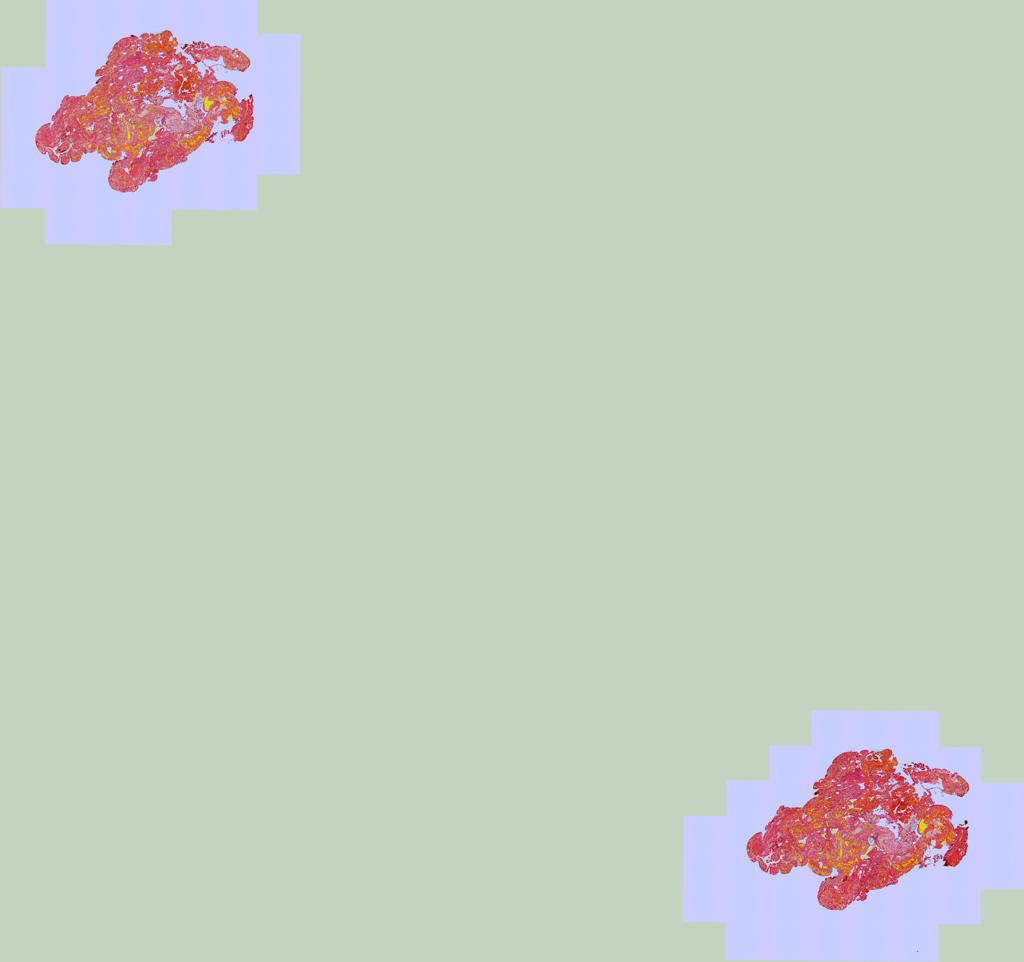

In [7]:
Image.open(r'C:\Users\hp\Downloads\archive\MAYO\CE\0aaeb3_0.png')

In [8]:
!pip install torchvision
import numpy as np
import os
import glob
import torch
import torch.nn as nn
from torchvision.transforms import transforms

In [9]:
from torch.utils.data import DataLoader
from torch.optim import Adam
from torch.autograd import Variable
import torchvision 
import pathlib

device=torch.device('cuda' if torch.cuda.is_available else 'cpu')
device

In [28]:
device=torch.device('cpu')

In [11]:
#transformer
transformer=transforms.Compose([
    transforms.Resize((150,150)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.5,0.5,0.5],
                        [0.5,0.5,0.5])
])

In [12]:
train_path=r'C:\Users\hp\Downloads\archive\MAYO'
test_path=r'C:\Users\hp\Downloads\archive\MAYO_TEST'
train_loader=DataLoader(
    torchvision.datasets.ImageFolder(train_path,transform=transformer),
batch_size=32,shuffle=True)
test_loader=DataLoader(
    torchvision.datasets.ImageFolder(test_path,transform=transformer),
batch_size=32,shuffle=True)

In [13]:
root=pathlib.Path(train_path)
classes=sorted([j.name.split('/')[-1] for j in root.iterdir()])
classes

['CE', 'LAA']

In [52]:
class ConvNet(nn.Module):
    def __init__(self,num_classes=6):
        super(ConvNet,self).__init__()
        
        #input shape = (32,3,150,150)
        self.conv1 = nn.Conv2d(in_channels=3,out_channels=12,kernel_size=3,stride=1,padding=1)
        #shape=(2,12,150,150)
        self.bn1=nn.BatchNorm2d(num_features=12)
        #shape=(32,12,150,150)
        self.relu1=nn.ReLU()
        #shape=(32,12,150,150)
        
        self.pool=nn.MaxPool2d(kernel_size=2)
        #reduces image size by half
        #shape=(32,12,75,75)
        
        self.conv2=nn.Conv2d(in_channels=12,out_channels=18,kernel_size=3,stride=1,padding=1)
        #shape=(32,18,75,75)
        self.relu2=nn.ReLU()
        #shape=(32,18,75,75)
        
        self.conv3=nn.Conv2d(in_channels=18,out_channels=24,kernel_size=3,stride=1,padding=1)
        #shape=(32,24,75,75)
        self.bn3=nn.BatchNorm2d(num_features=24)
        #shape=(32,24,75,75)
        self.relu3=nn.ReLU()
        #shape=(32,24,75,75)
        
        self.fc=nn.Linear(in_features=75*75*24,out_features=num_classes)

        
        #feed forward function
    def forward(self,output):
        output=self.conv1(output)
        output=self.bn1(output)
        output=self.relu1(output)
        
        output=self.pool(output)
        
        output=self.conv2(output)
        output=self.relu2(output)
            
        output=self.conv3(output)
        output=self.bn3(output)
        output=self.relu3(output)
        
        #above output will be a matrix with shape (32,24,75,75)
        
        output=output.view(-1,24*75*75)
            
            
        output=self.fc(output)
            
        return output

In [53]:
model=ConvNet(num_classes=6).to(device)

In [54]:
#optimizer and loss function
optimizer = Adam(model.parameters(),lr=0.001,weight_decay=0.0001)
loss_function=nn.CrossEntropyLoss()

In [62]:
num_epochs=8

In [56]:
#calculate size of training and testing images
train_count=len(glob.glob(train_path+'\**\*.png'))
test_count=len(glob.glob(test_path+'\**\*.png'))

In [57]:
print(train_count,test_count)

628 125


In [ ]:
#model training and saving best model
best_accuracy = 0.0

for epoch in range(num_epochs):
    
    #evaluating and training on training dataset
    model.train()
    train_accuracy=0.0
    train_loss=0.0
    
    for i, (images,labels) in enumerate(train_loader):
        if torch.cuda.is_available():
            images=Variable(images.cuda())
            labels=Variable(labels.cuda())
            
        optimizer.zero_grad()
        
        output = model(images)
        loss=loss_function(output,labels)
        optimizer.step()
        
        train_loss+=loss.cpu().data*images.size(0)
        _,prediction = torch.max(output.data,1)
        
        train_accuracy+=int(torch.sum(prediction==labels.data))
        
    train_accuracy=train_accuracy/train_count
    train_loss=train_loss/train_count
        
    #evaluating on testing dataset
    model.eval()
    
    test_accuracy = 0.0
    for i, (images,labels) in enumerate(test_loader):
        if torch.cuda.is_available():
            images=Variable(images.cuda())
            labels=Variable(labels.cuda())
            
        outputs=model(images)
        _,prediction=torch.max(outputs.data,1)
        test_accuracy+=int(torch.sum(prediction==labels.data))
    
    test_accuracy=test_accuracy/test_count
    
    
    print('Epoch: '+str(epoch)+' Train Loss: '+str(train_loss)+' Train Accuracy: '+str(train_accuracy)+' Test Accuracy: '+str(test_accuracy))
    
    #Save the best model
    if test_accuracy>best_accuracy:
        torch.save(model.state_dict(),'best_checkpoint.model')
        best_accuracy=test_accuracy    

Epoch: 0 Train Loss: tensor(2.0195) Train Accuracy: 0.03184713375796178 Test Accuracy: 0.048
Epoch: 1 Train Loss: tensor(2.0085) Train Accuracy: 0.03821656050955414 Test Accuracy: 0.064
Epoch: 2 Train Loss: tensor(2.0289) Train Accuracy: 0.042993630573248405 Test Accuracy: 0.048
Epoch: 3 Train Loss: tensor(2.0184) Train Accuracy: 0.03821656050955414 Test Accuracy: 0.048
Epoch: 4 Train Loss: tensor(2.0074) Train Accuracy: 0.0589171974522293 Test Accuracy: 0.064
Epoch: 5 Train Loss: tensor(2.0147) Train Accuracy: 0.04617834394904458 Test Accuracy: 0.032
